In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit
import scipy.integrate as integrate
import scipy.special as spec

In [4]:
'''OH Data'''
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158875n19625_67_ii.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:      6     158875-19625 2023-10-20 +11 25 44.5
          RADIO                  Ta    
        km/s-LSR                 I
       -991.6767553772205     -0.2616584
       -990.7508360423141     -0.2607413
       -989.8249167074742     -0.2605598
       -988.8989973725680     -0.2639814
       -987.9730780376616     -0.2625944
       -987.0471587028218     -0.2629168
       -986.1212393679156     -0.2638285
       -985.1953200330091     -0.2672855
       -984.2694006981029     -0.2703022
       -983.3434813632631     -0.2683565
       -982.4175620283567     -0.2618079
       -981.4916426934504     -0.2621953
       -980.5657233586106     -0.2637361
       -979.6398040237044     -0.2602480
       -978.7138846887980     -0.2586548
       -977.7879653538918     -0.2575111
       -976.8620460190519     -0.2559260
       -975.9361266841455     -0.2608431
       -975.0102073492393     -0.2581456
       -974.0842880143995     -0.2586488
       -973.1583686794930     -0.2556105
       -972

In [5]:
len(content)

134485

In [6]:
'''OH Data'''
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158875n19625_67_ii.ascii'
data = ascii.read(file_path, data_start=3)
x=data['col1']
y=data['col2']
df = pd.read_csv(file_path)
print(data)

       col1            col2    
------------------ ------------
-991.6767553772205   -0.2616584
-990.7508360423141   -0.2607413
-989.8249167074742   -0.2605598
 -988.898997372568   -0.2639814
-987.9730780376616   -0.2625944
-987.0471587028218   -0.2629168
-986.1212393679156   -0.2638285
-985.1953200330091   -0.2672855
-984.2694006981029   -0.2703022
-983.3434813632631   -0.2683565
-982.4175620283567   -0.2618079
-981.4916426934504   -0.2621953
-980.5657233586106   -0.2637361
               ...          ...
 2030.523953692185  0.002948806
 2031.449873027059  0.002317809
 2032.375792361965 -0.002897782
 2033.301711696838  0.002936187
 2034.227631031678   0.00132071
 2035.153550366617 0.0002971608
 2036.079469701457  0.003131595
 2037.005389036397 0.0003558484
 2037.931308371237  0.002915165
 2038.857227706176 -0.001350001
 2039.783147041016  0.004968503
 2040.709066375955  0.005984124
 2041.634985710795 -0.003615707
Length = 3277 rows


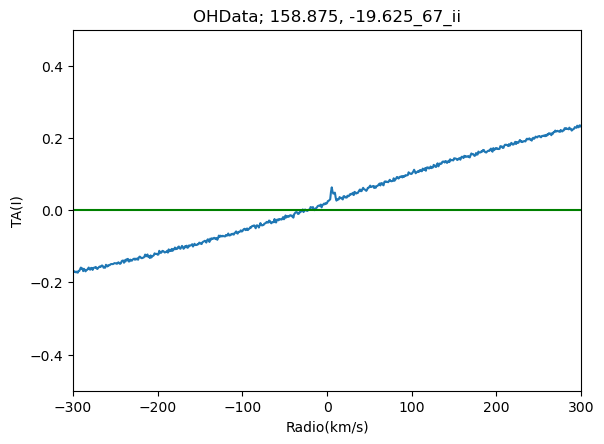

In [17]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]

plt.xlim([-300, 300])
plt.ylim([-.50, .50])
plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OHData; 158.875, -19.625_67_ii') # Creates a title for the plot
#plt.legend()
plt.tight_layout(pad=2.0) # so data doesn't overlap

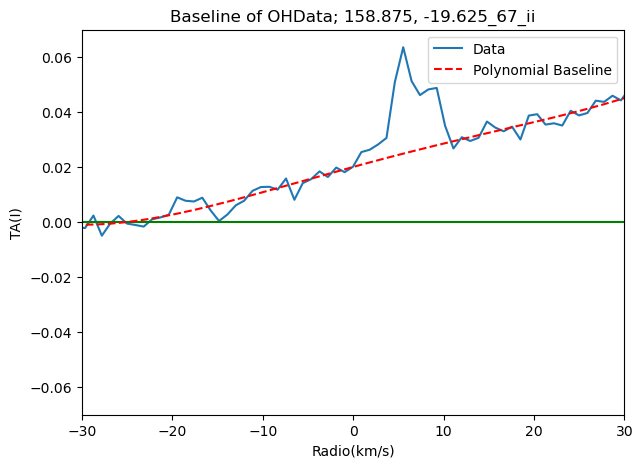

In [18]:
#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.07, .07])
plt.plot(x, y, label='Data')
plt.axhline(0, color='green')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Baseline of OHData; 158.875, -19.625_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [13]:
y_sub = y - y_eval

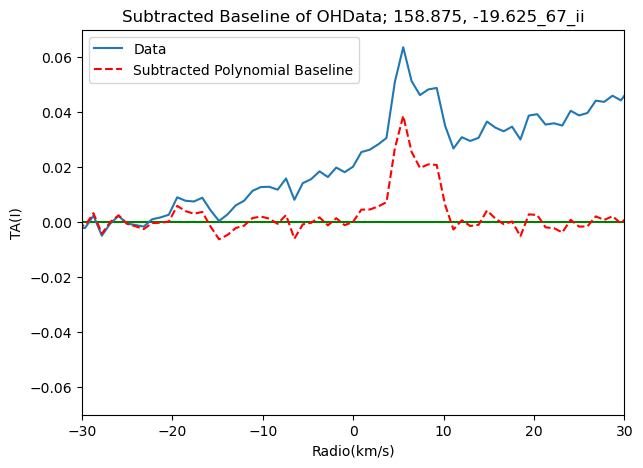

In [14]:
# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2
# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])
# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.07, .07])
plt.axhline(0, color='green')
plt.plot(x, y, label='Data')
plt.plot(x, y_sub, label='Subtracted Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Subtracted Baseline of OHData; 158.875, -19.625_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [33]:
gauss_model=GaussianModel()
region = np.where((x >= 0) & (x <= 10))[0]

In [34]:
# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
    x=vel 
    y_sub=ta
    # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # Initial Guess of the parameters
    params = gauss_model.guess(y_sub[region], x=x[region])
    # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y_sub[region], params, x=x[region])
    #fitresult = [region1fit, region2fit, region3fit]
    fitresult = [regionfit]
    return fitresult

In [35]:
fitResult = gaussFit(x, y_sub, bounds = [0, 10])

In [36]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.17482430,0.02696269,(15.42%),0.09474792474004916,-inf,inf,True,
center,6.39359294,0.39549294,(6.19%),5.538368295500461,-inf,inf,True,
sigma,2.31997993,0.44424152,(19.15%),0.9259193348896924,0.00000000,inf,True,
fwhm,5.46313513,1.04610882,(19.15%),2.1803733681849455,-inf,inf,False,2.3548200*sigma
height,0.03006268,0.00417614,(13.89%),0.04082316200959906,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


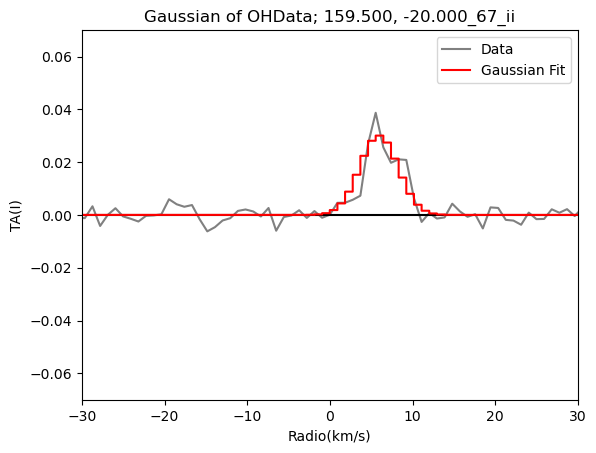

In [37]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-30, 30])
plt.ylim([-.07, .07])
plt.step(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 159.500, -20.000_67_ii') # Creates a title for the plot
plt.legend()
plt.show()